# Regression Model for Bike sharing demand of BoomBikes Organization

## Problem Statement:
A US bike-sharing provider BoomBikes aspires to understand the demand for shared bikes among the people. They have planned this to prepare themselves to cater to the people's needs once the situation after COVID-19 pandamic gets better all around. They want to stand out from other service providers and make huge profits to compensate all the loses incurred during the pandemic impact period.

### The company wants to know- :

Company has shared the data set of bike demand each day for few previous years and want to know which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

### Goal:

Develop a model to find the variables which are significant in predicting the demand for shared bikes from among the available independent variables.
It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

### 1: Importing Needed Libraries

In [3]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

### 2: Loading Dataset

In [4]:
#Read the csv file using pandas library
bikeSharingDataFrame = pd.read_csv('day.csv')

In [5]:
#Inspect first few rows to get visually understanding of data set
bikeSharingDataFrame.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
#check the shape of data set to undertsand number of data point and number of features
bikeSharingDataFrame.shape

(730, 16)

In [7]:
#check the details of numerical data
bikeSharingDataFrame.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#check dataframe for null and datatype 
bikeSharingDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
#Inspect unique values
bikeSharingDataFrame.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [10]:
#check the columns of data
bikeSharingDataFrame.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
#check the datatypes of data
bikeSharingDataFrame.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### There are 730 rows and 16 columns in the data set. There are no null values in any of the columns.
Below columns are categorial columns based on data definition as well as based on above information about their values
- season
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit 


## 3: Cleaning Data

3.1 Drop columns which are not useful for analysis

- `instant` is just a row identifier with no business significance.
- Business is looking to understand prediction of target `cnt` which includes `casual` and `registered` hence removing these two since these not independent feature but part of outcome or target variable.    

In [12]:
# Droping instant column
bikeSharingDataFrame.drop(['instant'], axis = 1, inplace = True)

# Dropping casual and registered columns
bikeSharingDataFrame.drop(['casual'], axis = 1, inplace = True)
bikeSharingDataFrame.drop(['registered'], axis = 1, inplace = True)

In [13]:
#Inspect data frame after dropping
bikeSharingDataFrame.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
#Inspect data frame info
bikeSharingDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


we can see that features like season, mnth, weekday and weathersit are integers although they should be non-numerical categories.

3.2 Handle Missing values

In [15]:
#Print null counts by column
bikeSharingDataFrame.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

There are no null values.

3.3 Handle Outliers

In [16]:
### get column names handy
bikeSharingDataFrame.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

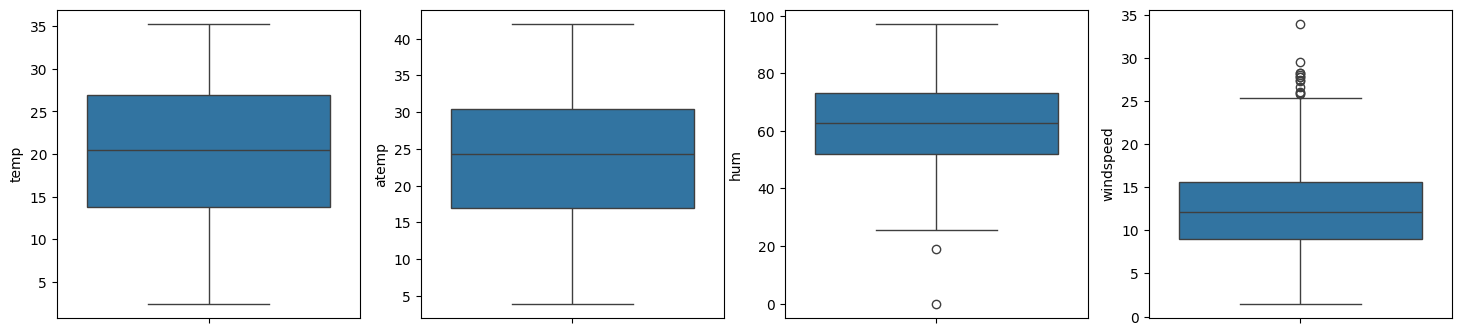

In [17]:
# Draw box plots for continuous variables
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

index = 1
for col in cols:
    plt.subplot(1,len(cols),index)
    sns.boxplot(y=col, data=bikeSharingDataFrame)
    index+=1

From these plots, we can see there are no outliers to be handled. (not values are at extreme end)

## 4. EDA

4.1 Convert season and weathersit to categorical types

In [18]:
bikeSharingDataFrame.weathersit.replace({1:'Fair', 2:'Misty', 3:'Cloudy', 4:'UnFair'}, inplace = True)
bikeSharingDataFrame.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True)
bikeSharingDataFrame.mnth = bikeSharingDataFrame.mnth.replace({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'})
bikeSharingDataFrame.weekday = bikeSharingDataFrame.weekday.replace({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'})
bikeSharingDataFrame.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,jan,0,mon,1,Fair,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,jan,0,tue,1,Fair,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,jan,0,wed,1,Fair,9.305237,11.46350,43.6957,12.522300,1600


#### 4.2 Derived variable

In [19]:
# Age of business based of date of data point collected and taking start date of business as '01-01-2018'
bikeSharingDataFrame['business_age'] = (pd.to_datetime(bikeSharingDataFrame['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days
# Dropping dteday as we have extracted all needed derived varible from it. (some of these already existed like mnth, weekday etc)
bikeSharingDataFrame.drop(['dteday'], axis = 1, inplace = True)


In [20]:
bikeSharingDataFrame['business_age'].describe()

count    730.000000
mean     364.500000
std      210.877136
min        0.000000
25%      182.250000
50%      364.500000
75%      546.750000
max      729.000000
Name: business_age, dtype: float64

#### 4.3 Draw pair Plots to check the linear relationship

<Figure size 1500x3000 with 0 Axes>

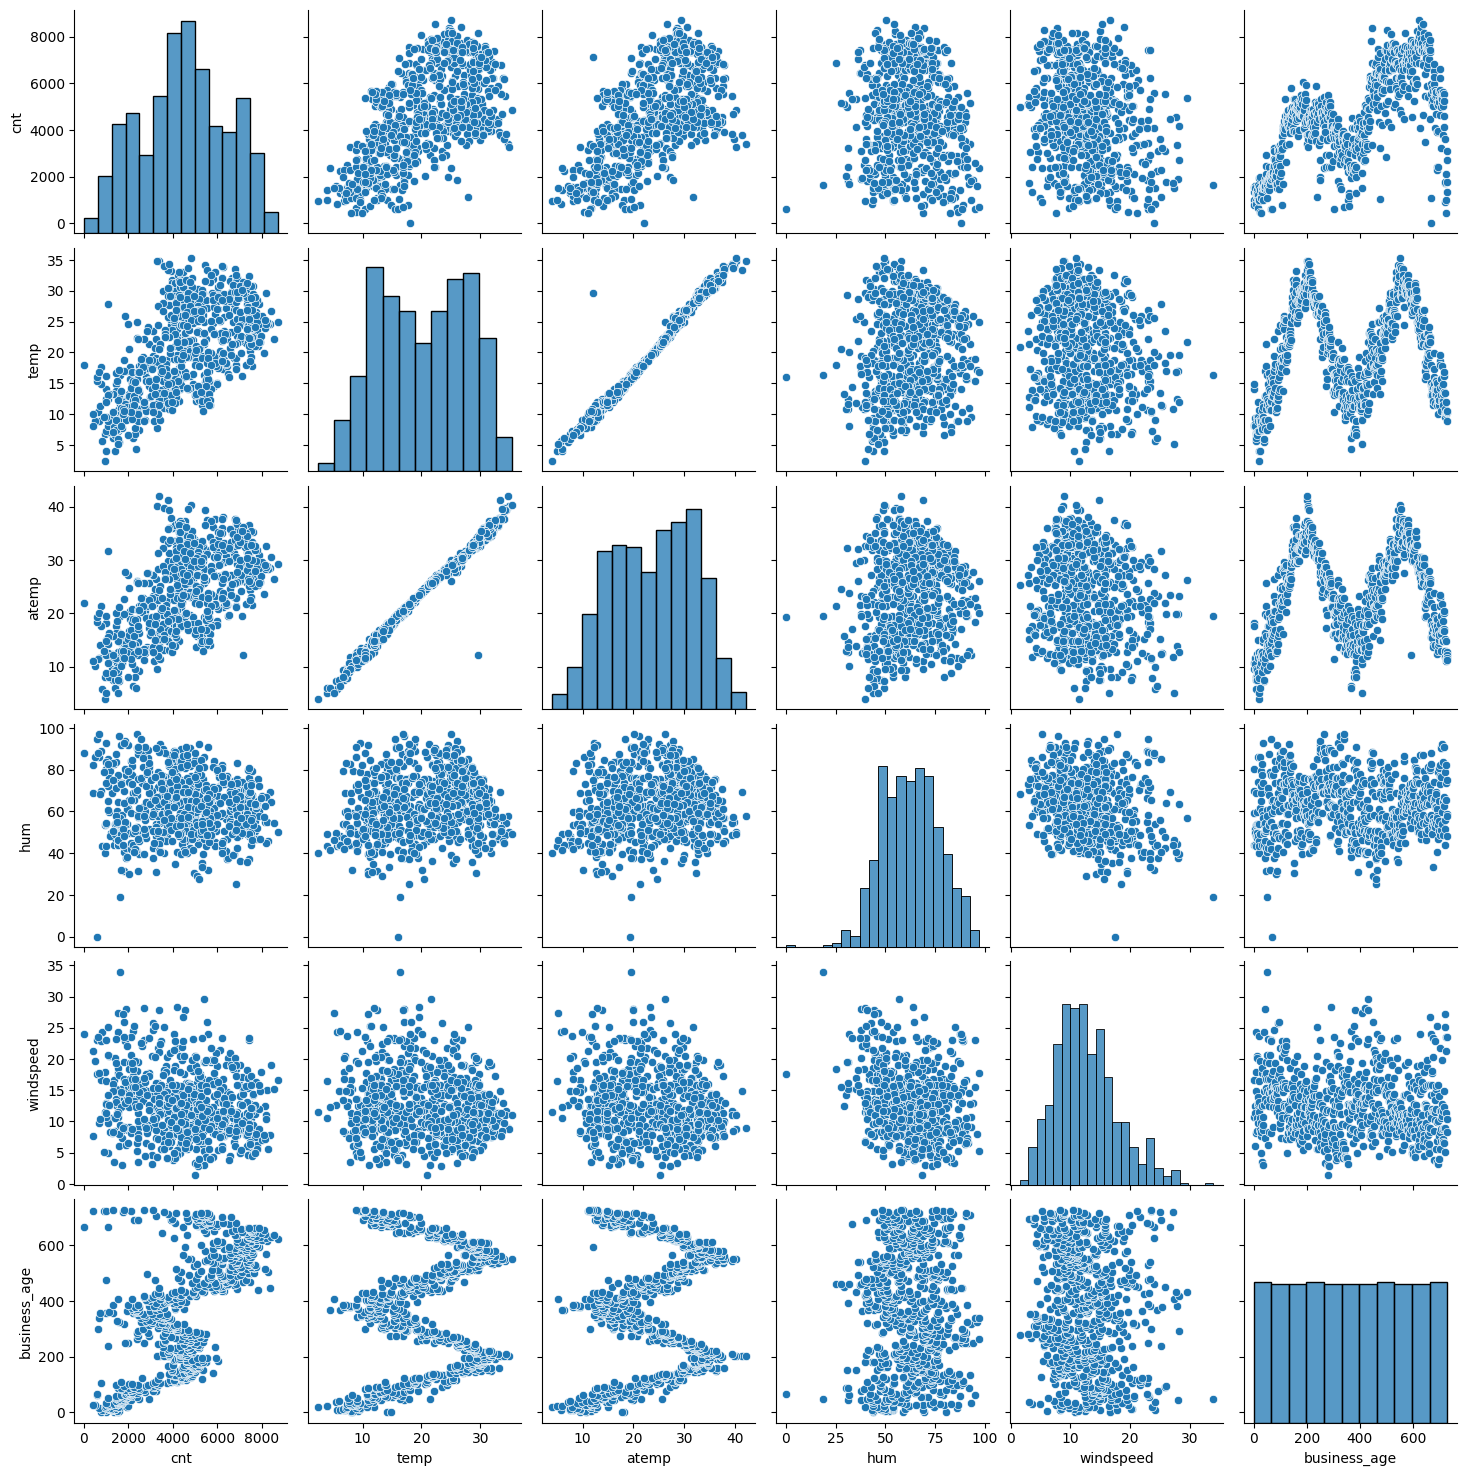

In [21]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharingDataFrame,vars=['cnt', 'temp', 'atemp', 'hum','windspeed', 'business_age'])
plt.show()

#### Inference
- Looks like the `temp` and `atemp` has the highest corelation with the target variable `cnt`
- `temp` and `atemp` are highly co-related with each other too
- `business_age` also has some degree of correlation with `cnt`

#### 4.4 Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 2000x1500 with 0 Axes>

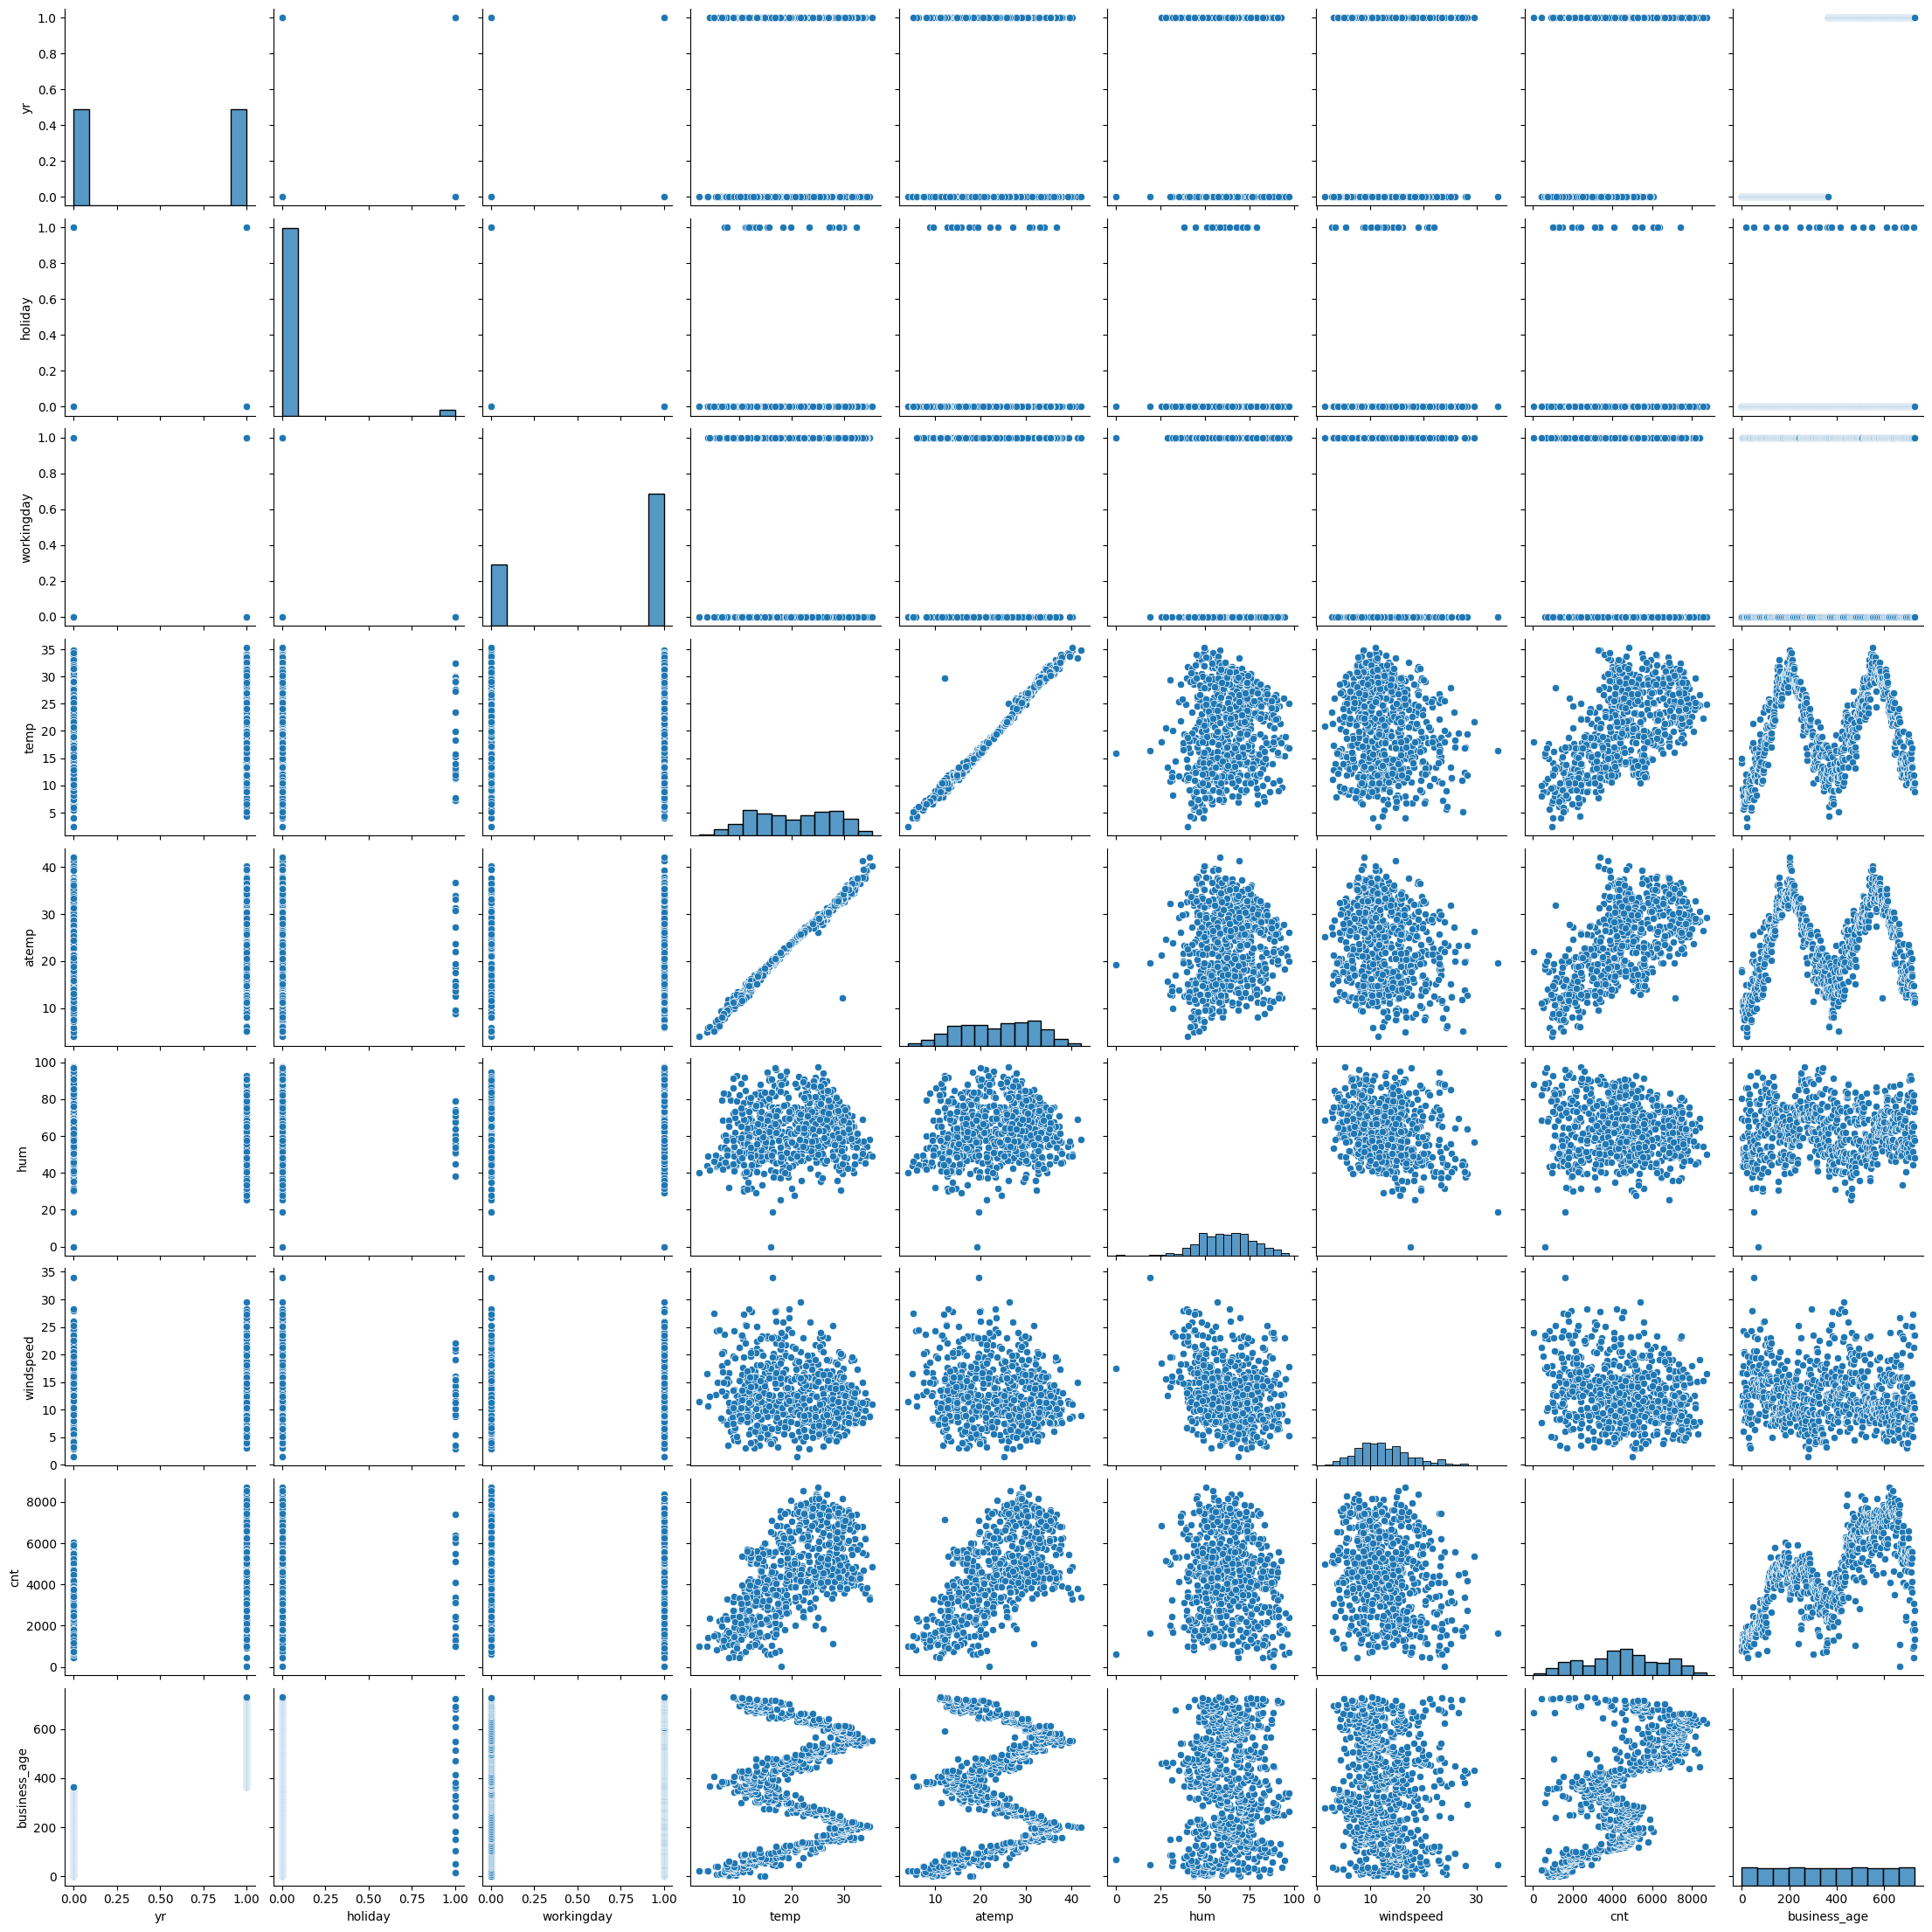

In [22]:
plt.figure(figsize=(20,15))
sns.pairplot(bikeSharingDataFrame)
plt.show()

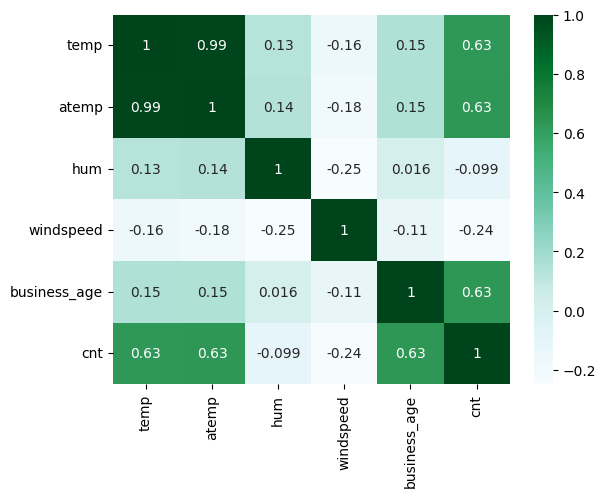

In [23]:
# Checking continuous variables relationship with each other
sns.heatmap(bikeSharingDataFrame[['temp', 'atemp', 'hum', 'windspeed', 'business_age', 'cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

#### Inference

- Here we see that temp and atemp are strongly correlated with each other (more than .99 means) and atemp seems to be derived from temp. Hence we can drop atemp.
- We also see that temp, atemp and business_age are the top correlating features with target variable cnt

#### 4.5 Analysing Categorical Variabels with target variables

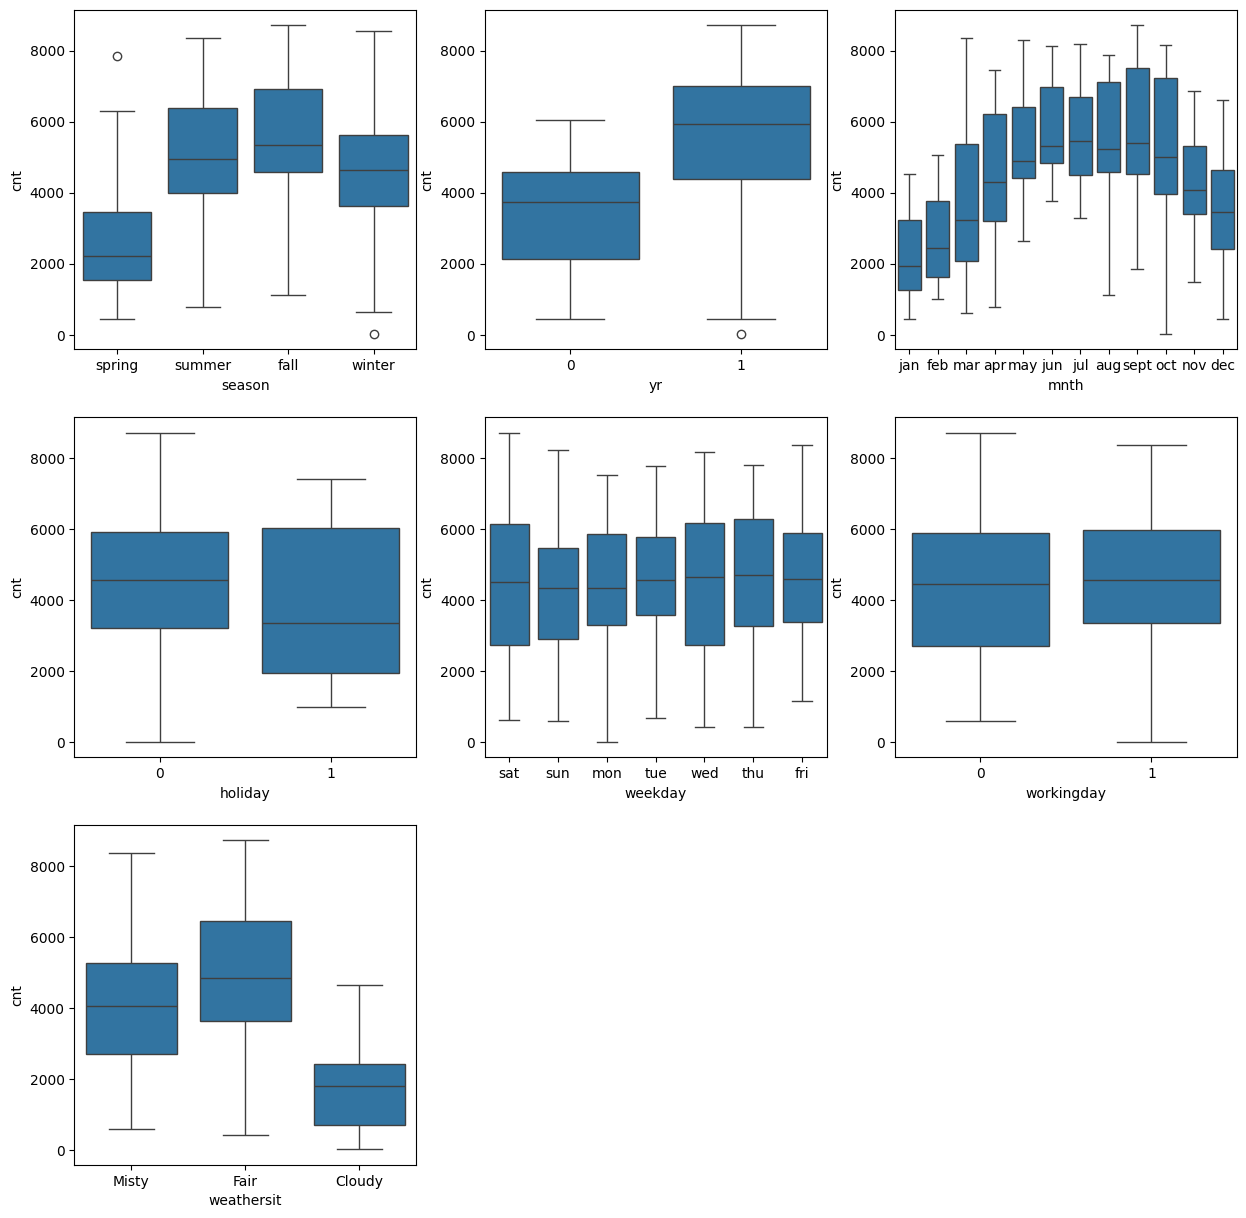

In [24]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharingDataFrame, x=i[1], y='cnt')
plt.show()

#### Inference:
Here many insights can be drawn from the plots

1. Demand year or year is growing
2. Season-3:fall has highest demand for rental bikes
3. Demand is mostly growing each month from January till September. After September, demand is decreasing till January.
4. Weekday is not showing influence on demand.
5. When there is a holiday, demand has decreased.
6. The Fair weathershit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.

# 5. Data Preparation for Linear Regression modeling

#### 5.1 Create dummy variables for all categorical variables

In [25]:
bikeSharingDataFrame = pd.get_dummies(data=bikeSharingDataFrame,columns=["season","mnth","weekday"], drop_first=True, dtype=int)
bikeSharingDataFrame = pd.get_dummies(data=bikeSharingDataFrame,columns=["weathersit"], drop_first=True, dtype=int)

- Dropping the first columns as (n-1) dummies can explain n categories.

In [26]:
#Print columns after creating dummies
bikeSharingDataFrame.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'business_age', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Fair', 'weathersit_Misty'],
      dtype='object')

# 6. Model Building

## 5.1 Split Data into training and test

In [27]:
# Checking shape before splitting
bikeSharingDataFrame.shape

(730, 31)

In [28]:
#Splitting target and independent variables
y=bikeSharingDataFrame.pop('cnt')
X=bikeSharingDataFrame

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [29]:
#Inspect independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,business_age,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Fair,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,1,1,0


In [30]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


### 5.2 Feature Scaling continuous variables

To make all features in same scale to interpret easily

Following columns are continous to be scaled
- temp
- atemp
- hum
- windspeed
- business_age

In [31]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [32]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','business_age']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [33]:
#Inspect stats fro Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,business_age,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Fair,weathersit_Misty
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.505822,0.242661,0.246575,...,0.086106,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.626223,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.288146,0.429112,0.431440,...,0.280795,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.484280,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.256181,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.512363,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.758929,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,business_age,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Fair,weathersit_Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.896978,0,0,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1.000000,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0,1,...,0,0,0,1,0,0,0,0,0,1


## 5.3 Build a Model using RFE and Automated approach

#### Use RFE to eliminate some columns

In [35]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
# Cut down number of features to 15 using automated approach
rfe = RFE(estimator=lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [37]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('business_age', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('mnth_aug', False, 6),
 ('mnth_dec', False, 15),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 11),
 ('mnth_mar', False, 9),
 ('mnth_may', False, 13),
 ('mnth_nov', False, 10),
 ('mnth_oct', False, 4),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 14),
 ('weekday_wed', False, 16),
 ('weathersit_Fair', True, 1),
 ('weathersit_Misty', True, 1)]

## 5.4 Manual elimination

##### Function to build a model using statsmodel api

In [38]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

##### Function to calculate VIFs and print them

In [39]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [40]:
# Columns selected by RFE. Start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'business_age', 'season_spring', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_Fair',
       'weathersit_Misty'],
      dtype='object')

In [41]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [53]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'business_age', 'season_spring', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_Fair',
       'weathersit_Misty']]

In [54]:
X_train_rfe.shape

(511, 15)

# 6. Build Model 

### 6.1 Model 1 - Start with all variables selected by RFE

In [56]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 
        'holiday', 
        'workingday', 
        'temp', 
        'hum', 
        'windspeed',
        'business_age', 
        'season_spring', 
        'season_winter', 
        'mnth_jul',
        'mnth_sept', 
        'weekday_sat',
        'weekday_sun', 
        'weathersit_Fair',
        'weathersit_Misty'
        ]

X_train[cols].info()

build_model(cols)
get_vif(cols)

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 653 to 520
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                511 non-null    int64  
 1   holiday           511 non-null    int64  
 2   workingday        511 non-null    int64  
 3   temp              511 non-null    float64
 4   hum               511 non-null    float64
 5   windspeed         511 non-null    float64
 6   business_age      511 non-null    float64
 7   season_spring     511 non-null    int32  
 8   season_winter     511 non-null    int32  
 9   mnth_jul          511 non-null    int32  
 10  mnth_sept         511 non-null    int32  
 11  weekday_sat       511 non-null    int32  
 12  weekday_sun       511 non-null    int32  
 13  weathersit_Fair   511 non-null    int32  
 14  weathersit_Misty  511 non-null    int32  
dtypes: float64(4), int32(8), int64(3)
memory usage: 47.9 KB
                            OLS Regres

## Model 2

In [87]:
# Dropping the variable workingday  due to high VIF
cols = ['yr', 
        'holiday', 
        #'workingday', 
        'temp', 
        'hum', 
        'windspeed',
        'business_age', 
        'season_spring', 
        'season_winter', 
        'mnth_jul',
        'mnth_sept', 
        'weekday_sat',
        'weekday_sun', 
        'weathersit_Fair',
        'weathersit_Misty'
        ]
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          8.23e-190
Time:                        22:43:32   Log-Likelihood:                -4121.7
No. Observations:                 511   AIC:                             8273.
Df Residuals:                     496   BIC:                             8337.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              862.5974    392.992  

## Model 3

In [88]:
# Dropping the variable business_age for high p-value
cols = ['yr', 
        'holiday', 
        #'workingday', 
        'temp', 
        'hum', 
        'windspeed',
        #'business_age', 
        'season_spring', 
        'season_winter', 
        'mnth_jul',
        'mnth_sept', 
        'weekday_sat',
        'weekday_sun', 
        'weathersit_Fair',
        'weathersit_Misty'
        ]
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.29e-190
Time:                        22:43:46   Log-Likelihood:                -4123.5
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     497   BIC:                             8334.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              787.1584    391.959  

## Module 4

In [89]:
# Dropping the variable hum due to high VIF
cols = ['yr', 
        'holiday', 
        #'workingday', 
        'temp', 
        #'hum', 
        'windspeed',
        #'business_age', 
        'season_spring', 
        'season_winter', 
        'mnth_jul',
        'mnth_sept', 
        'weekday_sat',
        'weekday_sun', 
        'weathersit_Fair',
        'weathersit_Misty'
        ]
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.75e-188
Time:                        22:44:31   Log-Likelihood:                -4131.5
No. Observations:                 511   AIC:                             8289.
Df Residuals:                     498   BIC:                             8344.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -265.9765    291.980  

## Model 5

In [91]:
# Dropping the variable weekday_sat due to high VIF
cols = ['yr', 
        'holiday', 
        #'workingday', 
        'temp', 
        #'hum', 
        'windspeed',
        #'business_age', 
        'season_spring', 
        'season_winter', 
        'mnth_jul',
        'mnth_sept', 
        #'weekday_sat',
        'weekday_sun', 
        'weathersit_Fair',
        'weathersit_Misty'
        ]
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.80e-189
Time:                        22:45:36   Log-Likelihood:                -4131.9
No. Observations:                 511   AIC:                             8288.
Df Residuals:                     499   BIC:                             8339.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -247.7500    291.344  

## Model 6

In [95]:
# Dropping temp causes R sequare value to drop significantly. Adding it again and dropping next high VIF
# Dropping the variable holiday as next high p value
cols = ['yr', 
        'holiday', 
        #'workingday', 
        'temp', 
        #'hum', 
        #'windspeed',
        #'business_age', 
        'season_spring', 
        'season_winter', 
        'mnth_jul',
        'mnth_sept', 
        #'weekday_sat',
        'weekday_sun', 
        'weathersit_Fair',
        'weathersit_Misty'
        ]
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.19e-183
Time:                        22:48:04   Log-Likelihood:                -4147.5
No. Observations:                 511   AIC:                             8317.
Df Residuals:                     500   BIC:                             8364.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -869.8839    277.455  

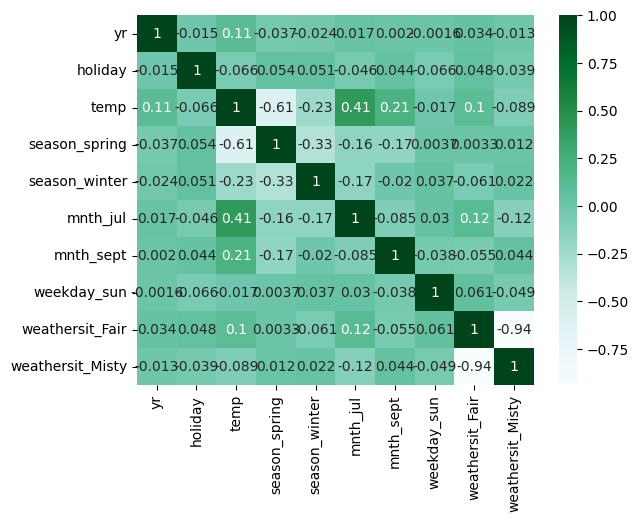

In [97]:
cols = ['yr', 
        'holiday', 
        #'workingday', 
        'temp', 
        #'hum', 
        #'windspeed',
        #'business_age', 
        'season_spring', 
        'season_winter', 
        'mnth_jul',
        'mnth_sept', 
        #'weekday_sat',
        'weekday_sun', 
        'weathersit_Fair',
        'weathersit_Misty'
        ]
sns.heatmap(X_train[cols].corr(), cmap='BuGn', annot = True)
plt.show()

In [124]:
# Dropping the variable mnth_jul as it has high corr with temp
cols = ['yr', 
        'holiday', 
        #'workingday', 
        'temp', 
        #'hum', 
        #'windspeed',
        #'business_age', 
        'season_spring', 
        'season_winter', 
        #'mnth_jul',
        'mnth_sept', 
        #'weekday_sat',
        'weekday_sun', 
        'weathersit_Fair',
        'weathersit_Misty'
        ]
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     258.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          7.64e-182
Time:                        23:13:27   Log-Likelihood:                -4154.7
No. Observations:                 511   AIC:                             8329.
Df Residuals:                     501   BIC:                             8372.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -746.3413    279.110  

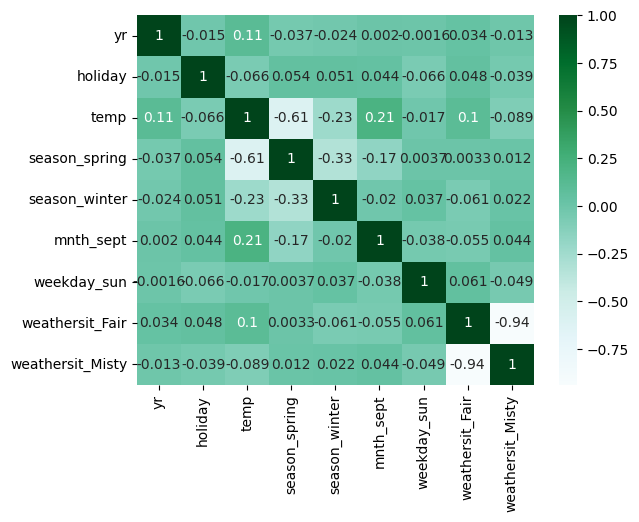

In [100]:
cols = ['yr', 
        'holiday', 
        #'workingday', 
        'temp', 
        #'hum', 
        #'windspeed',
        #'business_age', 
        'season_spring', 
        'season_winter', 
        #'mnth_jul',
        'mnth_sept', 
        #'weekday_sat',
        'weekday_sun', 
        'weathersit_Fair',
        'weathersit_Misty'
        ]
sns.heatmap(X_train[cols].corr(), cmap='BuGn', annot = True)
plt.show()

In [101]:
# Dropping the variable 'season_spring' as it has high corr with temp
cols = ['yr', 
        'holiday', 
        #'workingday', 
        'temp', 
        #'hum', 
        #'windspeed',
        #'business_age', 
        #'season_spring', 
        'season_winter', 
        #'mnth_jul',
        'mnth_sept', 
        #'weekday_sat',
        'weekday_sun', 
        'weathersit_Fair',
        'weathersit_Misty'
        ]
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     255.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.05e-171
Time:                        22:54:07   Log-Likelihood:                -4181.4
No. Observations:                 511   AIC:                             8381.
Df Residuals:                     502   BIC:                             8419.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1821.4587    251.349  

Removing season_spring drops R square value hence stopping prunning features now.

In [104]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [105]:
#Let us build the finalmodel using sklearn
cols = ['yr', 
        'holiday', 
        #'workingday', 
        'temp', 
        #'hum', 
        #'windspeed',
        #'business_age', 
        'season_spring', 
        'season_winter', 
        #'mnth_jul',
        'mnth_sept', 
        #'weekday_sat',
        'weekday_sun', 
        'weathersit_Fair',
        'weathersit_Misty'
        ]
#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

-746.3412750295493 [ 2040.94346875  -934.59229436  3720.78685721 -1010.69805025
   498.05235418   650.77848391  -432.89807784  2667.35392644
  1986.57926209]


## Step 7. Model Evaluation 
### 7.1 Residucal Analysis

In [106]:
y_train_pred = lr.predict(X_train[cols])

In [107]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

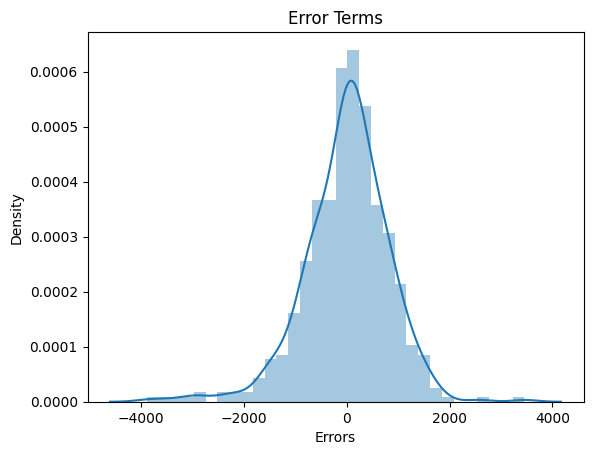

In [108]:
plot_res_dist(y_train, y_train_pred)

#### Errors are normally distribured here with mean 0. So everything seems to be fine

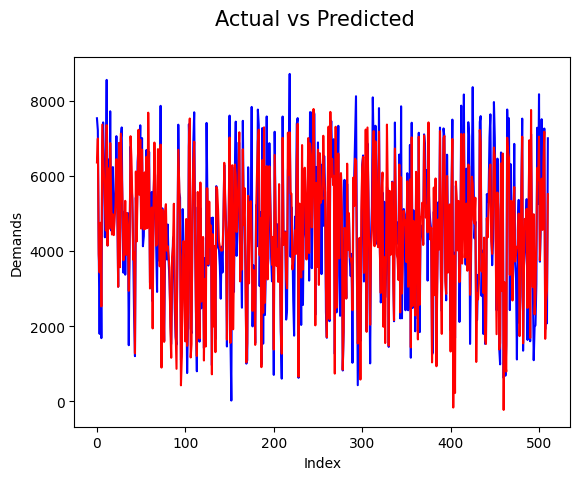

In [109]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and Predicted result following almost the same pattern so this model seems ok

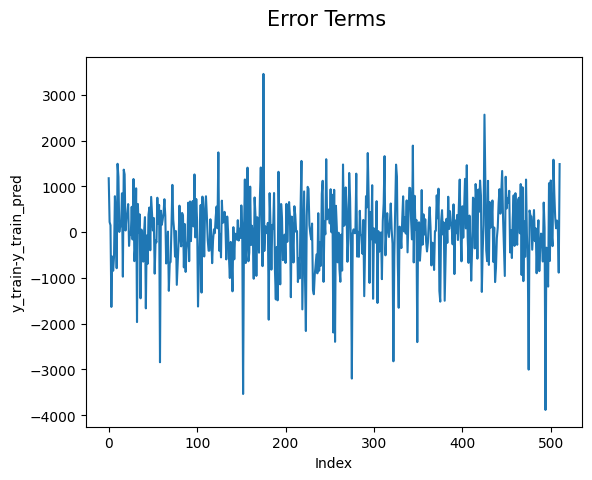

In [110]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Here,If we see the error terms are independent of each other.

In [111]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.822646096335827

### Inference
R2 Same as we obtained for our final model

### 7.2 Linearity Check

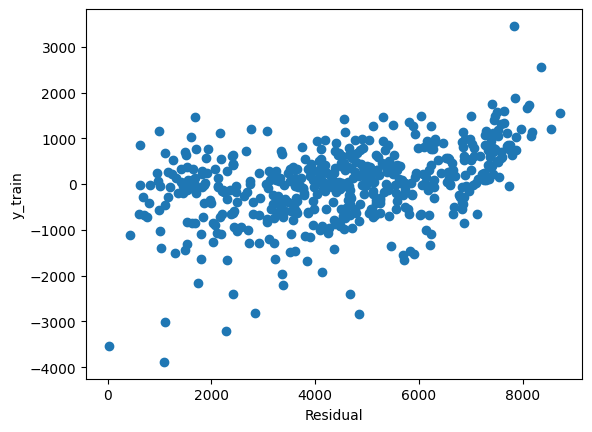

In [112]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### 7.3 Predict values for test data set

In [113]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','business_age']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [114]:
#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

### 7.4 R-Squared value for test predictions

In [115]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8102939676082295

### 7.5 Homoscedacity

##### Inference
R2 value for predictions on test data (0.81) is almost same as R2 value of train data(0.82). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

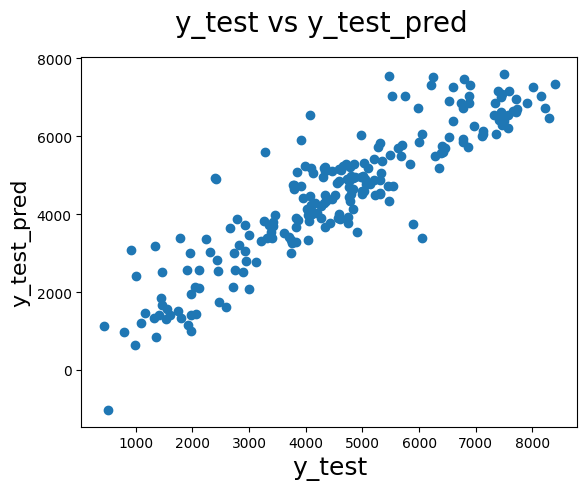

In [116]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

####  Inference
We can observe that variance of the residuals (error terms) is constant across predictions.  i.e error term does not vary much as the value of the predictor variable changes.

### 7.8 Plot Test vs Predicted test values

In [117]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

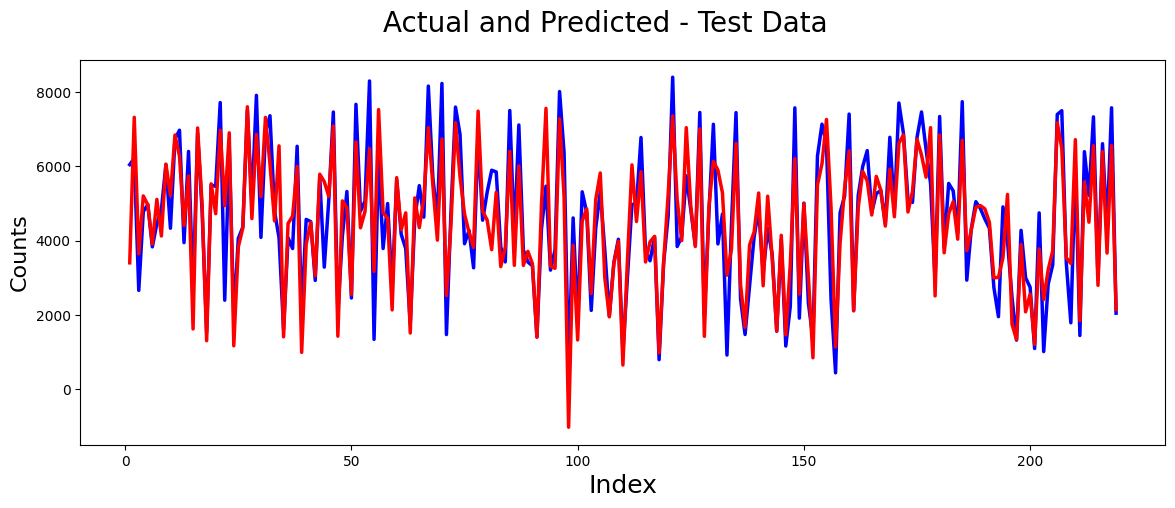

In [118]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

#### Inference
As we can see predictions for test data is very close to actuals

#### Inference
As we can see predictions for test data is very close to actuals

### 7.9 Plot Error Terms for test data

In [119]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

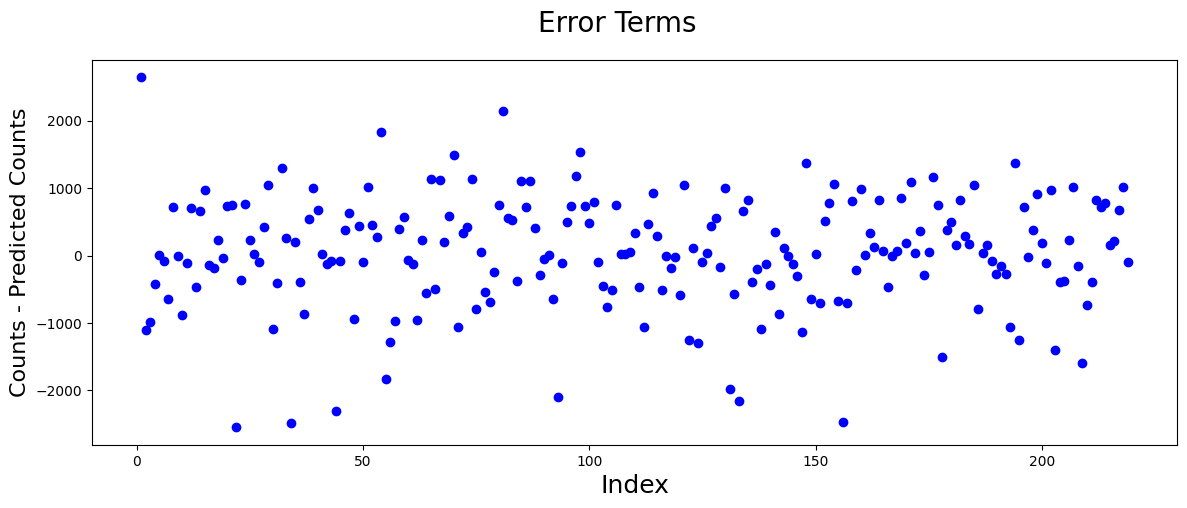

In [120]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

### 8. Making Predictions

In [121]:
# Checking data before scaling
bikeSharingDataFrame.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,business_age,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Fair,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,1,1,0


### 8.1 Intrepretting the Model

#### Let us go with interpretting the RFE with Manual model results as we give more importance to imputation

In [122]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     258.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          7.64e-182
Time:                        23:02:03   Log-Likelihood:                -4154.7
No. Observations:                 511   AIC:                             8329.
Df Residuals:                     501   BIC:                             8372.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -746.3413    279.110  

### Interepretation of results

### Analysing the above model, the comapany should focus on the following features:
- BoomBikes should focus on expanding business during Spring.
- BoomBikes should focus on expanding business during holidays.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019 since we see year over year increase in demand.
- There would be less bookings during Light to Heavy Snow or Rain, they could probably use this time to serive the bikes without having business impact

### Conclusion
Significant variables to predict the demand for shared bikes
- holiday
- temp
- Season (Specially Spring and Winter)
- months(January, July, September, November, December)
- Year (There is trend of year over year increase in demand in general)
- Sunday
- weathersit(<Clear, Few clouds, Partly cloudy, Partly cloudy and Mist> and <Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist>
)